# Central Limit Theorem


-------------------------------------------------------------------------------------------------------------------

## Introduction
investigation the Central Limit Theorem (CLT) using an exponentially distributed population and generation samples of different sizes from this population and examine how the distribution of sample means 
approaches a normal distribution as the sample size increases.

### Objectives
- Understand the exponential distribution and its properties.
- Explore the application of the CLT to the exponential distribution.
- Conduct hypothesis testing on the means of the samples.

## Instructions

Follow the tasks below to complete this assignment. Each task includes code placeholders and detailed prompts. 
Ensure you comment your code where appropriate.

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Task 1: Explore the Exponential Distribution

**Instructions:**
- Generate an exponentially distributed population with a mean of 2.0.
- Plot the histogram of the population.
- Compute and print the mean and standard deviation of the population.

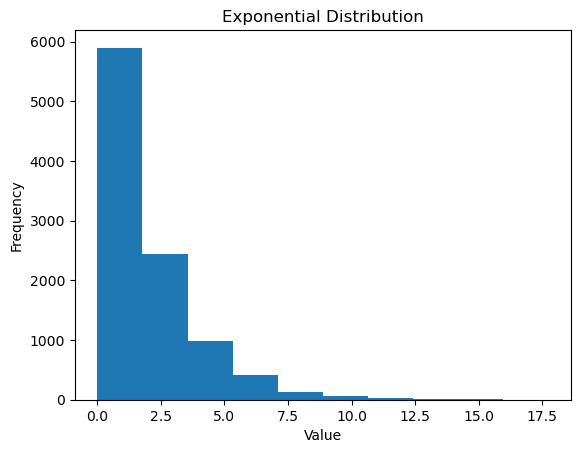

Mean = 1.9871767147832542
Median = 1.4002511992969113
Mode = 1.4002511992969113
Variance = 3.879629462868093
Standard Deviation = 1.969677502249567


In [95]:
# Task 1: Generate Exponential Distribution

# Step 1: Generate population
population = np.random.exponential(scale=2 , size=10000)


# Step 2: Plot histogram
plt.hist(population)
plt.title("Exponential Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


# Step 3: Calculate and print statistics
print(f"Mean = {np.mean(population)}")
print(f"Median = {np.median(population)}")
print(f"Mode = {np.median(population)}")
print(f"Variance = {np.var(population)}")
print(f"Standard Deviation = {np.std(population)}")

-------------------------------------------------------------------------------------------------------------

### Task 2: Sample Means and CLT

**Instructions:**
- Draw random samples of sizes `n = 5, 30, 100` from the population.
- Compute the sample means for 10,000 samples at each sample size.
- Plot the histograms of sample means for each sample size.
- Compare the histograms to a normal distribution.

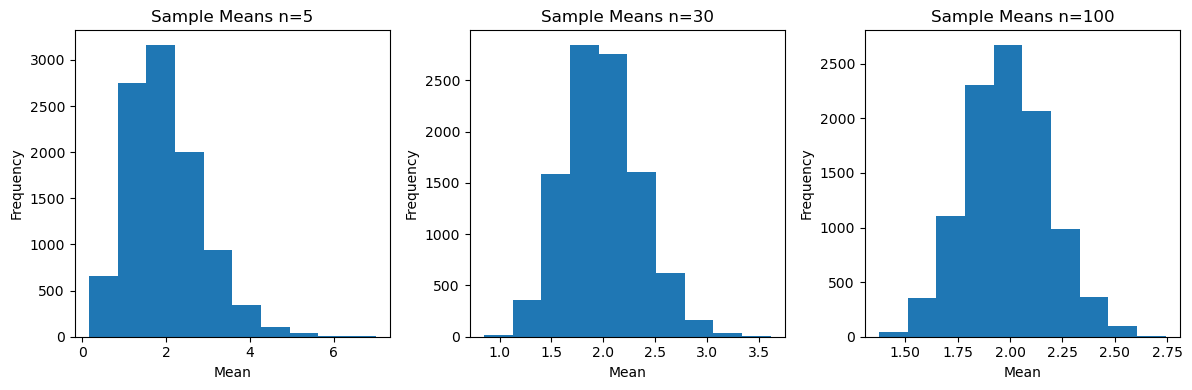

In [ ]:
# Step 1: Generate sample means
def calculate_mean(population, n, num_samples=10000):
    means = []
    for _ in range(num_samples):
        sample = np.random.choice(population, size=n, replace=True)
        mean = np.mean(sample)
        means.append(mean)
    return means

#for n =5
mean_5 = calculate_mean(population, 5)

#for n = 30
mean_30 = calculate_mean (population,30)

#for n = 100 
mean_100 = calculate_mean (population,100)

# Step 2: Plot histogram
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(mean_5)
plt.title(f"Sample Means n=5")
plt.xlabel("Mean")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
plt.hist(mean_30)
plt.title(f"Sample Means n=30")
plt.xlabel("Mean")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
plt.hist(mean_100)
plt.title(f"Sample Means n=100")
plt.xlabel("Mean")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### Step 3: Overlay normal distribution

##### sample_means for size = 5 tend to the normal exponantionl distrubuted of data as it has approximetly right sekeweted shape like the last histogram for the population itself
##### sample_means for size = 30 tend to normal distrubution with slight righ sekwetion 
##### sample_means for size = 100  show normal distrubution which totally different from the original shape of the population which ensure CLT that statistics values tend to normal distrubution even if it's original population is not normal

----------------------------------------------------------------------------------------------------------------------

### Task 3: Hypothesis Testing

**Instructions:**
- Select a sample size of `n = 30`.
- Perform a hypothesis test to determine if the sample mean is significantly different from the population mean.
- Use a significance level of 0.05.

In [ ]:
# Step 1: Generate a sample
sample = np.random.choice(population, size= 30)


# Step 2: Perform t-test
n = 30 
sample_mean = np.mean(sample)
pop_mean = np.mean(population)  
sample_std = np.std(sample, ddof=1) 
t_stat = (sample_mean - pop_mean) / (sample_std / np.sqrt(n))

t_stat



-1.962964732847175

### Step 3: Interpret results

#### t test shows the difference between the man of the sample and the mean of the population so if the result close to  zero that improve the mean of the sample is very close to the mean of the population so the null hypothesis H0 is claimed to be true and increading of t statistics value indicate that the sample has different mean (positive or negative) and different values compiring with population which may cause rejection of H0

#### according to t-table α = 0.05 , df = n- 1 = 30 - 1 = 29 then t_critical_approx = 2.045

In [98]:
# Step 3: Interpret results
t_critical_approx = 2.045
if abs(t_stat) > t_critical_approx:
    print("Reject H0 (difference is statistically significant).")
else:
    print("Fail to reject H0 (no significant difference).")

Fail to reject H0 (no significant difference).


-----------------------------------------------------------------------------------------------------------------------

### Task 4: Comparing Distributions

**Objective**: Compare how the Central Limit Theorem applies to different population distributions.

**Instructions:**
1. Use three different distributions: Uniform, Exponential, and a heavy-tailed distribution (e.g., Pareto).
2. For each distribution, generate a population and calculate sample means for sample sizes $n = 10, 50, 100$.
3. Compare the histograms of the sample means for the three distributions.
4. Discuss how the shape of the original population distribution influences the convergence to a normal distribution.

#### 1. Use three different distributions: Uniform, Exponential, and a heavy-tailed distribution


#### 2. For each distribution, generate a population and calculate sample means for sample sizes $n = 10, 50, 100$

In [99]:
uniform_pop = np.random.uniform(0, 1, size= 10000)
exp_pop = np.random.exponential(scale=2, size= 10000)
pareto_pop = np.random.pareto(a=3, size= 10000)

In [100]:
def sample_means(population, n, num_samples=10000):

    means = [np.mean(np.random.choice(population, size=n, replace=True)) 
             for _ in range(num_samples)]
    return means

In [101]:
sample_sizes = [10, 50, 100]
results = {}

for pop_name, pop_data in zip(["Uniform", "Exponential", "Pareto"],
                              [uniform_pop, exp_pop, pareto_pop]):
    results[pop_name] = {}
    for n in sample_sizes:
        results[pop_name][n] = sample_means(pop_data, n)
 
    

#### 3. Compare the histograms of the sample means for the three distributions.

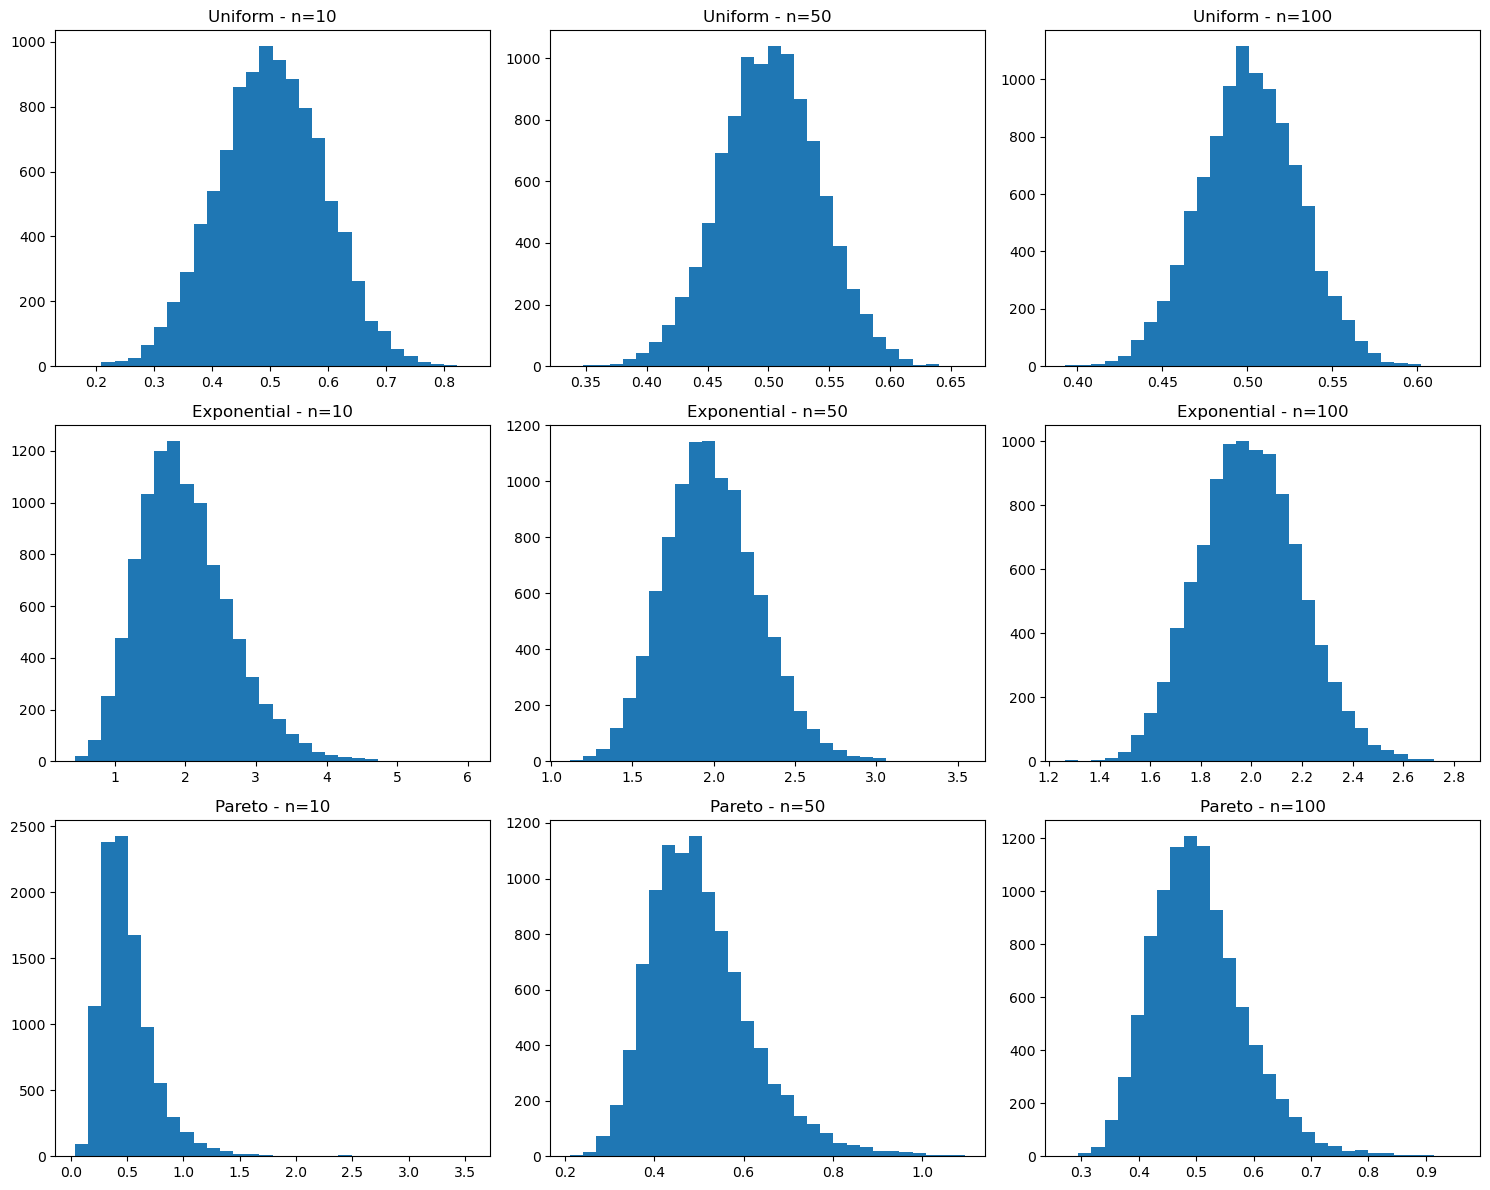

In [102]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

pop_names = ["Uniform", "Exponential", "Pareto"]

for i in range(3):                    
    pop_name = pop_names[i]

    for j in range(3):                 
        n = sample_sizes[j]

        axes[i, j].hist(results[pop_name][n], bins=30)
        axes[i, j].set_title(f"{pop_name} - n={n}")

plt.tight_layout()
plt.show()

#### the first line of histogram for uniform distrubution doesn't show a big difference with increasing of sample sizae because it already normal distrubeted

#### exponantial distrubtion first was tend to be right sekweted but with increasing n it very close to reach to the normal distrubution 

#### petro distrubution is very right sekweted more than exponantial distrubution so it also tend to reach the normal distrubution but with less rate so even in case n = 100 it try to closee the normal distrubution but it also still saved right skewtion so to reach normal distrubution we need to increase the sample size and plot the measures again 

### the final conculosion that all statistics of distubution tend to the normal distrubution but with different rate depend on it's real shape and the number of sample n 

-----------------------------------------------------------------------------------------------------------------------

### Task 5: Impact of Sample Size

**Objective**: Explore the impact of sample size on the accuracy of statistical inference.

**Instructions:**
1. Generate sample means for $n = 10, 30, 50, 100, 500$.
2. Calculate the standard error of the mean (SEM) for each sample size.
3. Plot the SEM against sample size and discuss the relationship.
4. Explain how the CLT justifies this relationship.

#### 1. Generate sample means for n = 10, 30, 50, 100, 500

In [103]:
sample_sizes = [10, 30, 50, 100, 500]
num_samples = 10000

def get_sample_means(pop, n, num_samples=10000):
    return [np.mean(np.random.choice(pop, size=n, replace=True)) for _ in range(num_samples)]

sample_means_dict = {}

for n in sample_sizes:
    sample_means_dict[n] = get_sample_means(population, n)

#### 2. Calculate the standard error of the mean (SEM) for each sample size.

In [104]:
#SEM = σ / sq (n)
SEM_values = {}

for n in sample_sizes:
    SEM_values[n] = np.std(sample_means_dict[n], ddof=1)

#### 3. Plot the SEM against sample size and discuss the relationship.

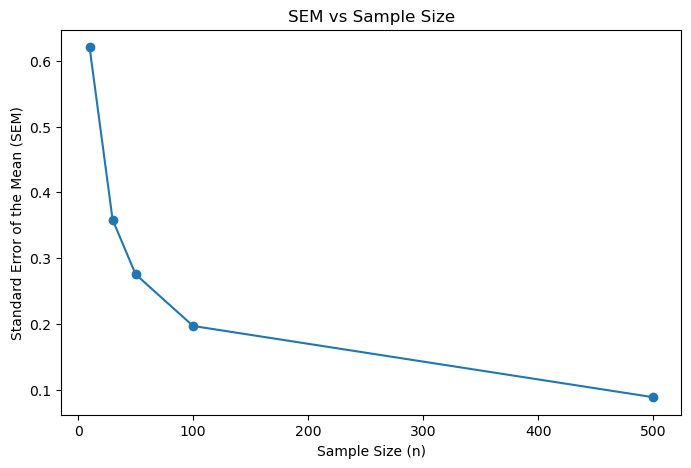

In [105]:
plt.figure(figsize=(8, 5))
plt.plot(sample_sizes, list(SEM_values.values()), marker='o')
plt.title("SEM vs Sample Size")
plt.xlabel("Sample Size (n)")
plt.ylabel("Standard Error of the Mean (SEM)")
plt.show()

#### 4. Explain how the CLT justifies this relationship.

SEM = σ / sq (n) so it decreade with increasing the sample size because the sample mean be close to the population mean so the standard error of mean decrease and the the root of n in equation explain why the line has curve shape 

#### This also ensure CLT that increasing samples make distubution very normal and statistical measures very close to population ones so the error be very low in calculations

----------------------------------------------------------------------------------------------------------------------

### Task 6: Working with Real-World Datasets

**Objective**: Apply the Central Limit Theorem to a real-world dataset to validate its application.

**Instructions:**
1. Load a real-world dataset (e.g., from `seaborn` or a CSV file).
2. Select a numeric column to analyze (e.g., `age`, `income`).
3. Randomly sample subsets of the data and compute the mean of the selected column for each subset.
4. Plot the histogram of the sample means and overlay it with a normal distribution curve.
5. Discuss how the CLT applies to the dataset and any potential limitations.


####  Step 1: Load the dataset 

In [106]:
data = pd.read_csv (r"D:\Diploma\Machine & Sta 651\Assigment 2\Titanic-Dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [107]:
num_nulls = data["Age"].isnull().sum()
num_nulls


177

In [108]:
data.dropna(subset=["Age"], inplace=True)

In [109]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### # Step 2: Sample subsets and compute means

In [110]:
age_array = data["Age"].to_numpy()
age_array

array([22.  , 38.  , 26.  , 35.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  , 31.  , 35.  ,
       34.  , 15.  , 28.  ,  8.  , 38.  , 19.  , 40.  , 66.  , 28.  ,
       42.  , 21.  , 18.  , 14.  , 40.  , 27.  ,  3.  , 19.  , 18.  ,
        7.  , 21.  , 49.  , 29.  , 65.  , 21.  , 28.5 ,  5.  , 11.  ,
       22.  , 38.  , 45.  ,  4.  , 29.  , 19.  , 17.  , 26.  , 32.  ,
       16.  , 21.  , 26.  , 32.  , 25.  ,  0.83, 30.  , 22.  , 29.  ,
       28.  , 17.  , 33.  , 16.  , 23.  , 24.  , 29.  , 20.  , 46.  ,
       26.  , 59.  , 71.  , 23.  , 34.  , 34.  , 28.  , 21.  , 33.  ,
       37.  , 28.  , 21.  , 38.  , 47.  , 14.5 , 22.  , 20.  , 17.  ,
       21.  , 70.5 , 29.  , 24.  ,  2.  , 21.  , 32.5 , 32.5 , 54.  ,
       12.  , 24.  , 45.  , 33.  , 20.  , 47.  , 29.  , 25.  , 23.  ,
       19.  , 37.  , 16.  , 24.  , 22.  , 24.  , 19.  , 18.  , 19.  ,
       27.  ,  9.  , 36.5 , 42.  , 51.  , 22.  , 55.5 , 40.5 , 51.  ,
       16.  , 30.  ,

In [111]:
age_array.mean()

29.69911764705882

In [112]:
sample_sizes = [5, 30, 100]
num_samples = 10000

def get_sample_means(age_array, n, num_samples=10000):
    return [np.mean(np.random.choice(age_array, size=n, replace=True)) for _ in range(num_samples)]

sample_means_dict = {}

for n in sample_sizes:
    sample_means_dict[n] = get_sample_means(age_array, n)


#### Step 3: Plot histogram of sample means &  Step 4: Overlay normal distribution curve

####  Step 5: Annotate the plot

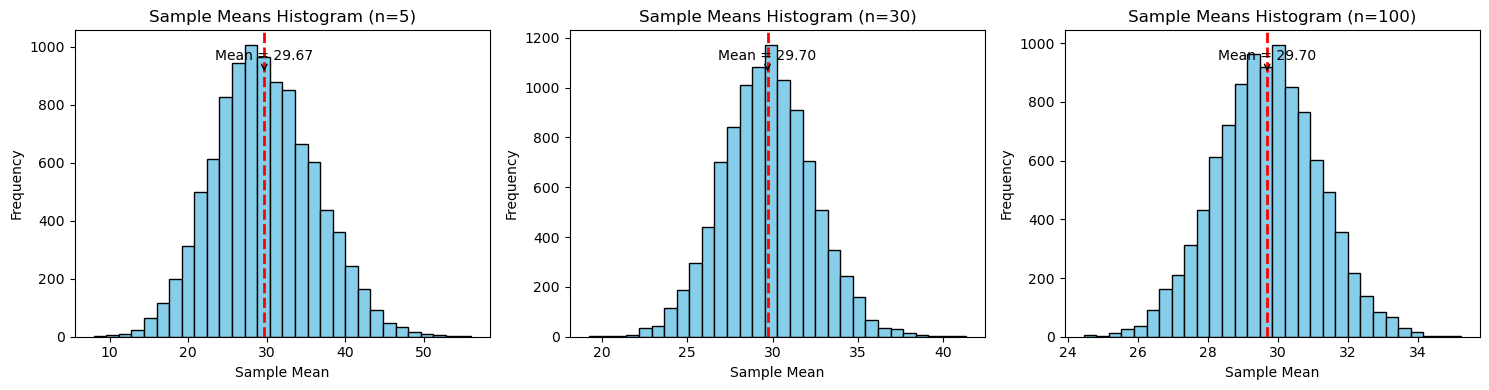

In [113]:
plt.figure(figsize=(15, 4))

for i in range(len(sample_sizes)):
    n = sample_sizes[i]
    means = sample_means_dict[n]
    
    plt.subplot(1, 3, i+1)
    counts, bins, patches = plt.hist(means, bins=30, color='skyblue', edgecolor='black')
    
    mean_val = np.mean(means)
    
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2)
    
    plt.annotate(f"Mean = {mean_val:.2f}", 
                 xy=(mean_val, max(counts)*0.9), 
                 xytext=(mean_val, max(counts)*0.95),
                 arrowprops=dict(facecolor='black', arrowstyle="->"),
                 horizontalalignment='center')
    
    plt.title(f"Sample Means Histogram (n={n})")
    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#### Increasing n make the data more normally distrubeted but with small change and this appear that the data already normally distrubted so the mean value very close to each other and close also to the mean of the population

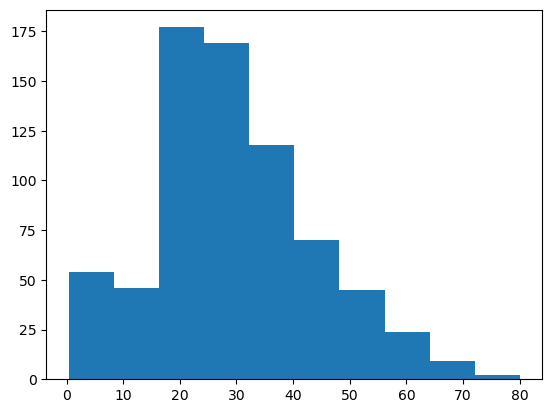

In [ ]:
#Histogram of the population
plt.hist(age_array)
plt.show()

---------------------------------------------------------------------------------------